In [ ]:
#Two ways to import env vars, easier way seems to be with a text file
import os
import fredpy as fp
import matplotlib as plt


def set_vars(secrets_file="a.env"):
    with open(f"{secrets_file}", 'r') as file:
        contents = file.read()
        env_vars = contents.replace('export ', '').split("\n")
        fp.api_key = env_vars[0].split("=")[1]
        print(api_key)
#set_vars()

def easy_import():
    fp.api_key = fp.load_api_key('cucumber.txt')
    print(fp.api_key)
easy_import()

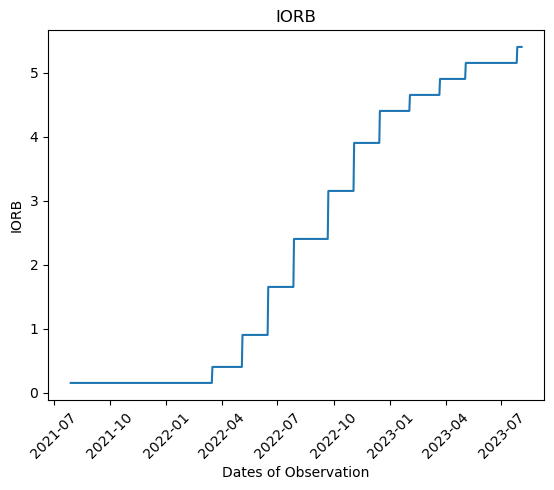

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import fredpy as fp
from fredapi import Fred
import mplcyberpunk

plt.style.context('cyberpunk')

register_matplotlib_converters()

series_id = 'IORB'

# Define the start and end date of the chart
start_date = '2000-01-01'
end_date = '2023-07-31'

# Define the forecast date
forecast_date = '2025-03-31'

fp.api_key = fp.load_api_key('cucumber.txt')
fp = Fred(api_key=fp.api_key)

api_key = fp.api_key

def forecast_chart(series_id, start_date, end_date, api_key):
    # Get the data for the specified series
    data = fp.get_series(series_id, start_date=start_date, end_date=end_date)
    
    # Check if there is data for the specified series within the given date range
    if len(data) == 0:
        print("No data found for the specified series within the given date range")
        return
    
    # Plot the data
    plt.plot(data.index, data.values)
    
    # Add axis labels and title
    plt.xlabel('Dates of Observation')
    plt.ylabel(series_id)
    plt.title(series_id)

    # Format the x-axis date ticks and rotate the labels
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

forecast_chart(series_id, start_date, end_date, api_key)


<IPython.core.display.Javascript object>


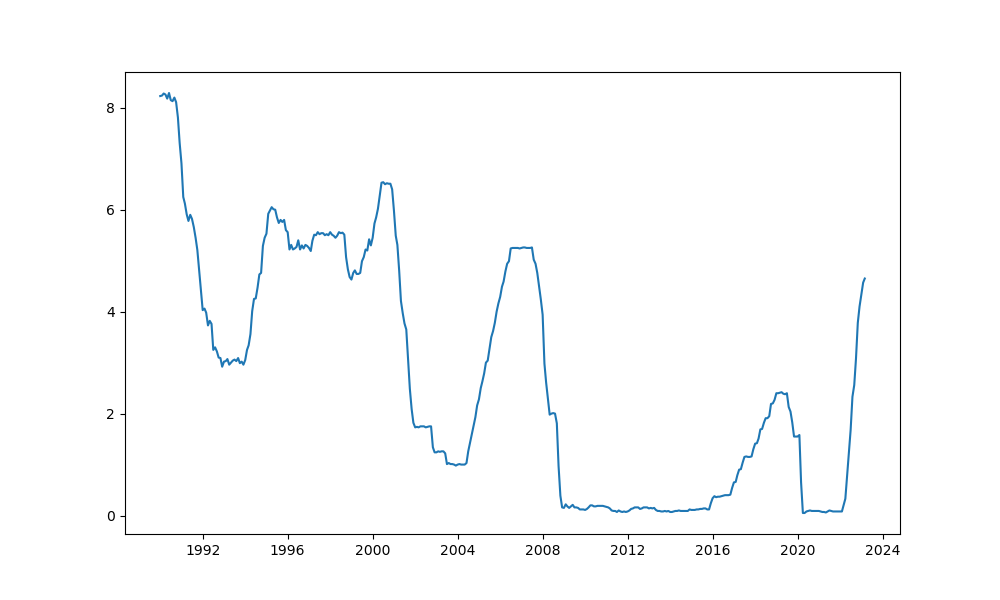

<IPython.core.display.Javascript object>


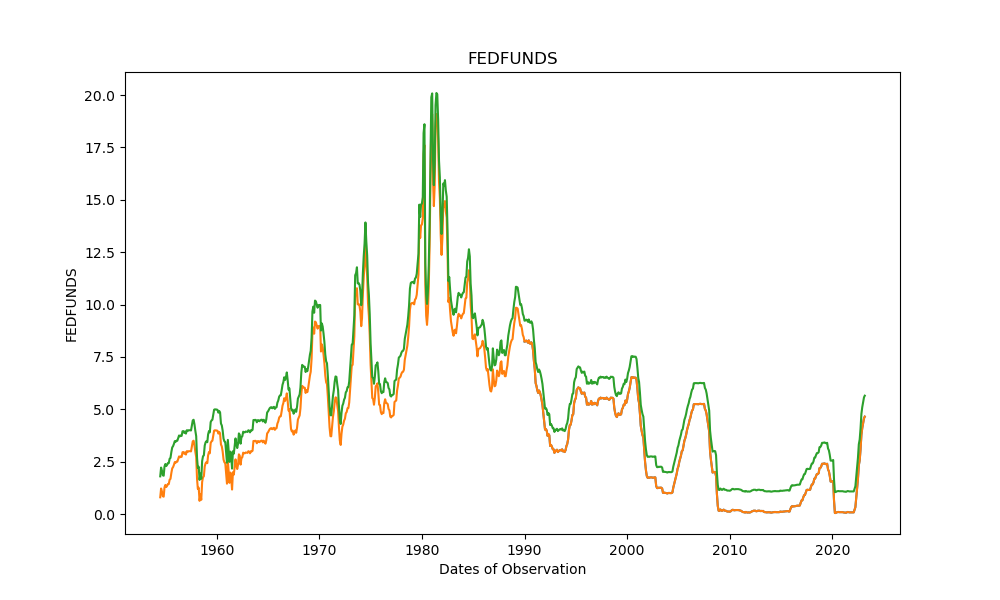

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

In [52]:
import matplotlib.pyplot as plt
import fredpy as fp
from fredapi import Fred
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk

plt.style.use("seaborn-dark")

fp.api_key = fp.load_api_key('cucumber.txt')
fp = Fred(api_key=fp.api_key)

series_id = 'IORB'

# Define the start and end date of the chart
start_date = '1990-01-01'
end_date = '2023-07-31'

# Define the forecast date
forecast_date = '2025-03-31'

# Define the number of periods to forecast
forecast_periods = 4


def forecast_chart(series_id, start_date, end_date):
    data = fp.get_series(series_id, start_date, end_date)
    
    dates = pd.to_datetime(data.index)
    x_obs = data.index.tolist()
    y_obs = data.tolist()
    
    plt.plot(x_obs, y_obs, label='observed')
    
    # Define your own projection function
    # Here's an example of projecting the data by adding a constant value to each observation
    projected_data = data + 1
    
    x_proj = projected_data.index.tolist()
    y_proj = projected_data.tolist()
    
    plt.plot(x_proj, y_proj, label='projected')
    plt.title(series_id)
    historical_end_date = dates[-1].strftime('%Y-%m-%d')
    forecast_start_date = (dates[-1] + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    forecast_end_date = end_date
    fig, ax = plt.subplots(figsize=(10,6))
    
        # Only try to plot forecast if there is historical data
    if len(data) > 0:
        # Get historical data for forecasting
        historical_data = fp.get_series(series_id, end_date=historical_end_date)
        
        # Compute the forecast
        forecast = compute_forecast(historical_data)
        
        # Create forecast dates
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
        
        # Plot forecast
        ax.plot(dates, data, label=series_id)
    
    
    
    
    dates = pd.to_datetime(data.index)
    if len(data) == 0:
        print("No data found for the specified series within the given date range")
        return
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(dates, data, label=series_id)
    ax.set_xlabel('Dates of Observation')
    ax.set_ylabel(series_id)
    ax.set_title('Historical and Projected Data for ' + series_id)
    
    historical_end_date = dates[-1].strftime('%Y-%m-%d')
    forecast_start_date = (dates[-1] + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    forecast_end_date = end_date
    
    # Only try to plot forecast if there is historical data
    if len(data) > 0:
        # Get historical data for forecasting
        historical_data = fp.get_series(series_id, end_date=historical_end_date)
        
        # Compute the forecast
        forecast = compute_forecast(historical_data)
        
        # Create forecast dates
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
        
        # Plot forecast
        ax.plot(forecast_dates, forecast, label='Projected ' + series_id)
        
    ax.legend()
    plt.show()

def compute_forecast(data):
    # Implement your own projection function here
    # For demo purposes, just using a simple linear projection
    x = range(len(data))
    y = data
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    forecast = slope * (x[-1] + 1) + intercept
    return [forecast]

forecast_chart(series_id, start_date, end_date)


NameError: name 'compute_forecast' is not defined

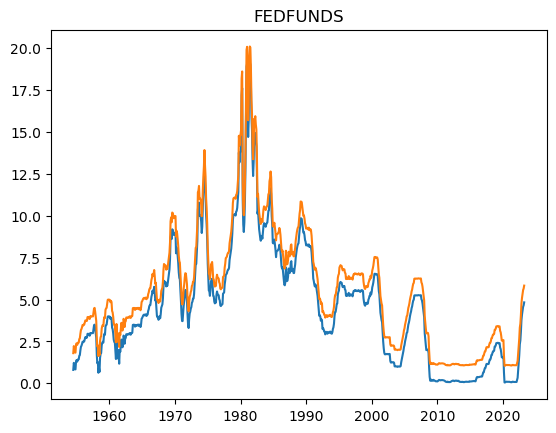

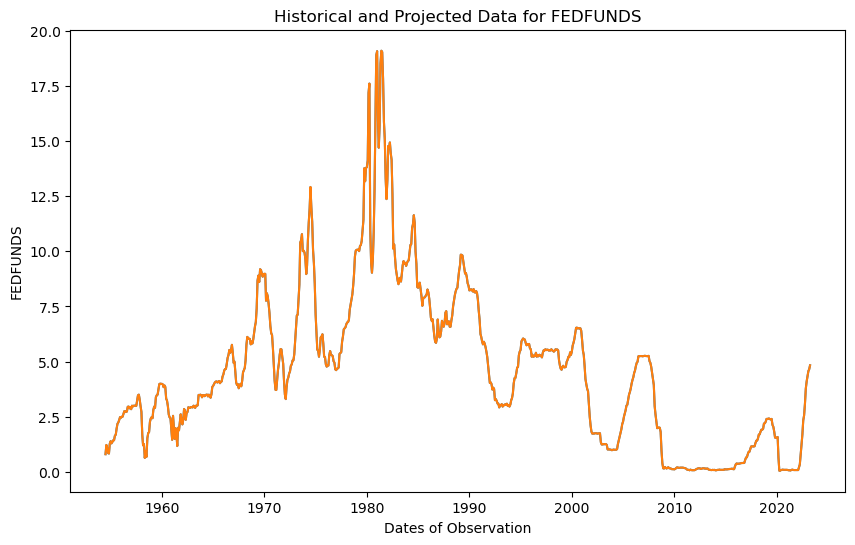

In [2]:
import requests
import json
import matplotlib.pyplot as plt
from fredapi import Fred
import fredpy as fp
import pandas as pd
import numpy as np

fp.api_key = fp.load_api_key('cucumber.txt')

fred = Fred(api_key=fp.api_key)

series_id = 'FEDFUNDS'
start_date = '2020-01-01'
end_date = '2023-04-31'
forecast_date = '2024-12-31'


fred = Fred(api_key=fp.api_key)



# Define the start and end date of the chart
start_date = '1990-01-01'
end_date = '2023-03-31'

# Define the forecast date
forecast_date = '2024-12-31'



# Define the FRED series ID you want to plot
series_id = 'FEDFUNDS'


# Define the number of periods to forecast
forecast_periods = 4



def forecast_chart(series_id, start_date, end_date):
    data = fred.get_series(series_id, start_date=start_date, end_date=end_date)
    dates = pd.to_datetime(data.index)
    x_obs = data.index.tolist()
    y_obs = data.tolist()
    
    plt.plot(x_obs, y_obs, label='observed')
    
    # Define your own projection function
    # Here's an example of projecting the data by adding a constant value to each observation
    projected_data = data + 1
    
    x_proj = projected_data.index.tolist()
    y_proj = projected_data.tolist()
    
    plt.plot(x_proj, y_proj, label='projected')
    plt.title(series_id)
        
    historical_end_date = dates[-1].strftime('%Y-%m-%d')
    forecast_start_date = (dates[-1] + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    forecast_end_date = end_date
    forecast_end_date = end_date
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(dates, data, label=series_id)
    ax.set_xlabel('Year')
    ax.set_ylabel(series_id)
    ax.set_title('Historical and Projected Data for ' + series_id)
    ax.plot(dates, data, label=series_id)
    ax.set_xlabel('Dates of Observation')
    ax.set_ylabel(series_id)
    ax.set_title('Historical and Projected Data for ' + series_id)
    
    
        # Only try to plot forecast if there is historical data
    if len(data) > 0:
        # Get historical data for forecasting
        historical_data = fred.get_series(series_id, end_date=historical_end_date)
        
        # Compute the forecast
            
        forecast = compute_forecast(historical_data)
       
        # Create forecast dates
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
        
        # Plot forecast
        ax.plot(forecast_dates, forecast, label='Projected ' + series_id)
    
    
    
    plt.legend()

    plt.xlim(start_date, forecast_date)
    plt.show()
    
    
    
def compute_forecast(data):
    # Implement your own projection function here
    # For demo purposes, just using a simple linear projection
    x = range(len(data))
    y = data
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    forecast = slope * (x[-1] + 1) + intercept
    return [forecast]

forecast_chart(series_id, start_date, end_date)


In [ ]:
#From https://www.briancjenkins.com/fredpy/docs/build/html/fredpy_examples.html#Load-API-key
#Basic Chart and Attribute Extracting Script
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt
from fredapi import Fred

fp.api_key = fp.load_api_key('cucumber.txt')

fred = Fred(api_key=fp.api_key)

# Use matplotlib's 'classic' style, set figure facecolor to white
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

#Plot GDP
# Download quarterly real GDP data using `fredpy`. Save the data in a variable called gdp
gdp = fp.series('gdpc1')
# Note that gdp is an instance of the `fredpy.series` class
#print(type(gdp))

# Print the title, the units, the frequency, the date range, and the source of the gdp data
print(gdp.title)
print(gdp.units)
print(gdp.frequency)
print(gdp.date_range)
print(gdp.source)
print(gdp.notes)
#print(gdp.data)

# Print the last 4 values of the gdp data
print(gdp.data[-4:],'\n')


# Restrict GDP to observations from January 1, 1990 to present
win = ['01-01-1990','01-01-2200']
gdp_win = gdp.window(win)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp_win.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp_win.title)
ax.set_ylabel(gdp_win.units)

# Plot recession bars
gdp_win.recessions()





# Plot real GDP data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);



#Plot Unemployment Rate
#fig = plt.figure()
#u = fp.series('UNRATE')
#plt.plot(u.data.index,u.data.values,'-',lw=3,alpha = 0.65)
#plt.grid()
#plt.ylabel('Percent');

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
from fredapi import Fred

fp.api_key = fp.load_api_key('cucumber.txt')

def plot_series_fill_between(series_ids):
    # Define start and end dates
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

    # Create empty dataframe to hold data
    df = pd.DataFrame()

    # Iterate through series IDs and add data to dataframe
    for series_id in series_ids:
        fred = Fred(api_key=api_key)
        data = fred.get_series(series_id, start_date=start_date, end_date=end_date)
        df[series_id] = data

    # Create plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_facecolor('lightgray')
    ax.set_title('US Current and Capital Accounts Last 20 Years')

    for series_id in series_ids:
        ax.fill_between(df.index, df[series_id].min(), df[series_id], alpha=0.5)
        ax.plot(df.index, df[series_id], label=series_id)

    ax.legend()
    plt.show()

series_ids = ['NETFI']
plot_series_fill_between(series_ids)


In [ ]:
import fredpy as fp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set up the FRED API key
fp.api_key = fp.load_api_key('cucumber.txt')

# Define the series IDs we want to fetch
series_ids = ['GDPC1', 'GDPDEF', 'UNRATE', 'PAYEMS']

# Fetch the data and create the dataframes
data = fp.series(series_ids)
df = pd.DataFrame(data, columns=series_ids, index=)

# Create the figure and axis for the chart
fig, ax = plt.subplots()
df.plot(ax=ax)

# Set the title and axis labels
ax.set_title('US Economic Indicators')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Show the legend at the bottom
ax.legend(loc='lower center', ncol=len(df.columns))

# Show the chart
plt.show()


In [ ]:
#Test if Series IDs work
import pandas as pd
import requests


base_url = "https://fred.stlouisfed.org/series/"
series_ids = ["GDPC1", "UNRATE", "CPIAUCSL", "PAYEMS", "BOPBCA027NBEA"]

available_series = []

for series_id in series_ids:
    url = base_url + series_id
    response = requests.get(url)
    
    if response.status_code == 200:
        available_series.append(series_id)

df = pd.DataFrame({"Series ID": available_series})

print(df)


In [ ]:
import fredapi
import pandas as pd
from datetime import datetime, timedelta
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=fp.api_key)

# Set up the date ranges
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Get the data from FRED
data = fred.get_series('BOPBCA027NBEA', start_date, end_date)

# Convert the data to a dataframe
df = pd.DataFrame(data, columns=['Balance of Payments'])

# Print the dataframe
print(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
from fredapi import Fred

fp.api_key = fp.load_api_key('cucumber.txt')


# Define the start and end date for the data you want to retrieve
start_date = '2018-01-01'
end_date = '2023-04-01'

# Retrieve the data for the desired series ID
series_id = 'UNRATE'
data = fp.series(series_id, start_date=start_date, end_date=end_date)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=[series_id])

# Plot the data using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df[series_id], label=series_id)
ax.set_title(f'{series_id} from {start_date} to {end_date}')
ax.legend()
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
import numpy as np
%matplotlib nbagg

fp.api_key = fp.load_api_key('cucumber.txt')

def plot_series_fill_between(series_ids):
    # Define start and end dates
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

    # Create empty dataframe to hold data
    df = pd.DataFrame()

    # Iterate through series IDs and add data to dataframe
    for series_id in series_ids:
        try:
            data = fp.series(series_id)
            df[series_id] = data
        except Exception as e:
            print(f"Error fetching data for series ID {series_id}: {str(e)}")

    # Create plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_facecolor('lightgray')
    ax.set_title('US Current and Capital Accounts Last 20 Years')

    for series_id in series_ids:
        if np.isna(df[series_id]).all():
            ax.fill_between(df.index, 0, df[series_id], alpha=0.5)
            ax.plot(df.index, df[series_id], label=series_id)

    ax.legend()
    plt.show()

series_ids = ['NETFI', 'IEABC', 'INVALID']
plot_series_fill_between(series_ids)


In [ ]:
import pandas as pd
from fredapi import Fred
import fredpy as fp



api_key = fp.load_api_key('cucumber.txt')import fredpy as fp


fp.api_key = fp.load_api_key('cucumber.txt')

def get_latest_series():
    # Retrieve the 100 most recently updated series
    latest_series = Fred.get_series(sort_order='desc', order_by='observation_end', limit=100)

    # Get the 25 most recent series by observation end date
    latest_series = latest_series.sort_values(by='observation_end', ascending=False).head(25)

    # Return the list of series IDs
    return latest_series.index.tolist()

get_latest_series()


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://fred.stlouisfed.org/series/'

# Fetch the webpage content
response = requests.get(url)
content = response.content

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

# Find all the series IDs in the page
series_ids = []
for link in soup.find_all('a'):
    href = link.get('href')
    if href is not None and href.startswith(url):
        series_id = href[len(url):]
        series_ids.append(series_id)

# Filter the active series IDs
active_series_ids = []
for series_id in series_ids:
    series_url = f"{url}{series_id}"
    response = requests.get(series_url)
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    status_tag = soup.find_all('a', class_='series-title')
    active_series_ids.append(series_id)

# Print the active series IDs
print(active_series_ids)


In [29]:
#List available Series IDs
import requests
from bs4 import BeautifulSoup

base_url = 'https://fred.stlouisfed.org/tags/series'
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')
series_links = soup.find_all('a', class_='series-title')
series_ids = [link['href'].split('/')[-1] for link in series_links]

print(series_ids)

['T10Y2Y', 'FEDFUNDS', 'MORTGAGE30US', 'WALCL', 'M2SL', 'BAMLH0A0HYM2', 'CPIAUCSL', 'UNRATE', 'T10Y3M', 'GDP', 'GDPC1', 'DGS10', 'CSUSHPINSA', 'RRPONTSYD', 'T10YIE', 'MSPUS', 'M1SL', 'T5YIE']


In [ ]:
#Get series IDs, careful this is very data hungry
import string
import itertools
import requests

# generate a list of potential series IDs
letters = string.ascii_uppercase
numbers = '0123456789'
patterns = ['{}{}{}', '{}{}{}{}', '{}{}{}{}{}', '{}_{}{}{}', '{}_{}{}{}{}', '{}_{}{}{}{}{}']
combinations = itertools.product(letters + numbers, repeat=6)
potential_series_ids = potential_series_ids = (pattern.format(*combo) for combo in combinations for pattern in patterns)


# test each series ID and print the list of working series IDs
base_url = 'https://fred.stlouisfed.org/series/{}'
working_series_ids = []
for series_id in potential_series_ids:
    url = base_url.format(series_id)
    response = requests.get(url)
    if response.status_code == 200:
        working_series_ids.append(series_id)

print(working_series_ids)


In [ ]:
#Simplified series extractor
import matplotlib.pyplot as plt
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')


# Initialize the FRED API client
fred = Fred(api_key=fp.api_key)

# Define the FRED series ID you want to plot
series_id = 'FEDFUNDS'

# Retrieve the FRED series data
data = fred.get_series(series_id)

# Define the start and end date of the chart
start_date = '1990-01-01'
end_date = '2023-03-31'

# Subset the data based on the start and end date
data = data.loc[start_date:end_date]

# Create the plot
plt.plot(data.index, data.values)

# Set the title and axis labels
plt.title(f'{series_id} from {start_date} to {end_date}')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


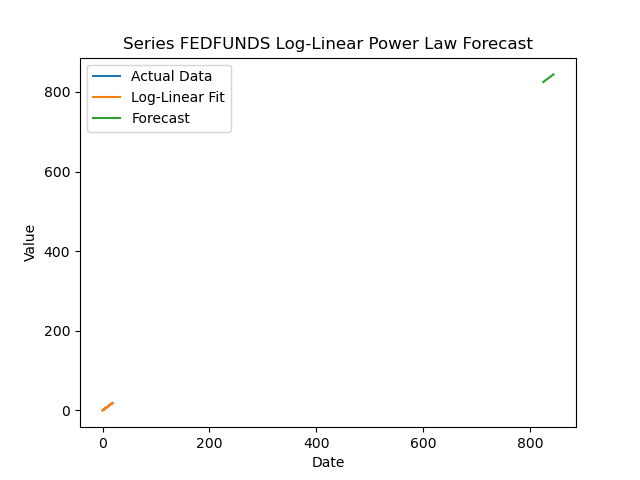

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import fredapi
from scipy.optimize import curve_fit
import fredpy as fp
%matplotlib nbagg

fp.api_key = fp.load_api_key('cucumber.txt')


# Initialize the FRED API client
fred = Fred(api_key=fp.api_key)

# Define the FRED series ID you want to plot
series_id = 'FEDFUNDS'

# Define the start and end date of the chart
start_date = '1990-01-01'
end_date = '2023-03-31'


def plot_power_law_forecast(api_key, series_id, start_date=start_date, end_date=end_date, forecast_years=5):
    # Load FRED series data using fredapi
    fred = fredapi.Fred(api_key=fp.api_key)
    data = fred.get_series(series_id, start_date=start_date, end_date=end_date)
    time_range = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    
    # Calculate log values of data and time
    log_data = np.log(data)
    log_time = np.log(time_range)
    
    # Define power law function to fit
    def power_law(t, a, b):
        return a + b*t
    
    # Fit power law to data
    params, cov = curve_fit(power_law, log_time, log_data)
    
    # Generate forecast values
    forecast_time = np.arange(len(time_range), len(time_range) + forecast_years*4)
    forecast_data = np.exp(power_law(np.log(forecast_time), *params))
    
    # Plot data, fit, and forecast
    plt.plot(time_range, data, label='Actual Data')
    plt.plot(time_range, np.exp(power_law(log_time, *params)), label='Log-Linear Fit')
    plt.plot(forecast_time, forecast_data, label='Forecast')
    
    # Set plot labels and legend
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Series {series_id} Log-Linear Power Law Forecast')
    plt.legend()
    
    # Show plot
    plt.show()
plot_power_law_forecast(fp.api_key, series_id, start_date=None, end_date=None, forecast_years=5)

In [ ]:
#Search Series by latest release query
from fredapi import Fred
import fredpy as fp



api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=api_key)


# Get list of all series IDs
series_ids = fred.get_series_latest_release("GDP")

# Print first 10 series IDs
print(series_ids[:10])


In [ ]:
#This code checks for the API response
#It should be the series ID, instead it is printing out the data attribute. Further debugging required.
import requests
import json
import fredpy as fp


fp.api_key = fp.load_api_key('cucumber.txt')

series_id = 'FEDFUNDS'

def get_series_data(series_id):
    url = 'https://api.stlouisfed.org/fred/series/observations'
    payload = {'series_id': series_id, 'api_key': fp.api_key, 'file_type': 'json'}
    response = requests.get(url, params=payload)

    try:
        data = json.loads(response.text)
        observations = data['observations']
        dates = [obs['date'] for obs in observations]
        values = [float(obs['value']) for obs in observations]
        return dates, values
    except json.JSONDecodeError:
        print(f"Error decoding JSON response for series ID {series_id}")
        return [], []
get_series_data(series_id)